In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv('D:\python folder\weather.csv')
data.dropna(inplace=True)

In [3]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [5]:
X = data.drop('RainTomorrow', axis=1)  
y = data['RainTomorrow']

In [6]:
categorical_cols = ['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm']
X = pd.get_dummies(X, columns=categorical_cols)        

In [7]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 0.97
Precision: 1.00
F1 Score: 0.89


In [12]:
#random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [17]:
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 0.95
Precision: 1.00
F1 Score: 0.82


In [18]:
# Support vector machine
from sklearn.svm import SVC

In [19]:
SVM = SVC(kernel='linear')

In [20]:
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = SVM.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 0.95
Precision: 1.00
F1 Score: 0.82


In [24]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
DTC = DecisionTreeClassifier()


In [26]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = DTC.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00


In [30]:
#naive bayes 
from sklearn.naive_bayes import GaussianNB

In [31]:
NB = GaussianNB()

In [32]:
NB.fit(X_train, y_train)

GaussianNB()

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
y_pred = NB.predict(X_test)

In [35]:
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
y_pred = GBC.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [40]:
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 1.00
Precision: 1.00
F1 Score: 1.00


In [41]:
clf_nb = GaussianNB()
clf_lr = LogisticRegression()
clf_dt = DecisionTreeClassifier()
clf_svm = SVC()
clf_rf = RandomForestClassifier()
clr_gbc= GradientBoostingClassifier()


In [42]:
classifiers = {'NB': clf_nb,'GBC': clr_gbc,
               'LR': clf_lr,
               'DT': clf_dt,
               'SVM': clf_svm,
               'RF': clf_rf}

In [43]:
accuracy_scores = []
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


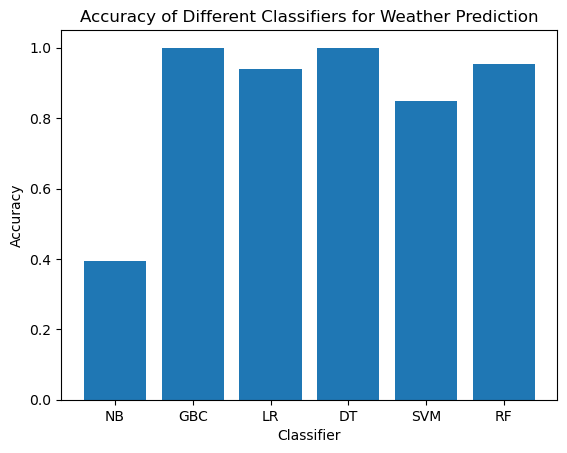

In [44]:
plt.bar(classifiers.keys(), accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers for Weather Prediction')
plt.show()

In [45]:
#plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
#plt.xlabel('Principal Component')
#plt.ylabel('Explained Variance Ratio')
#plt.title('PCA Explained Variance Ratio')
#plt.show()